## Sentiment Analysis across Patches
Gulliver Wutz

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
reddit_posts = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/reddit_posts_sentiment_2.csv')
reddit_posts.columns

Index(['Subreddit', 'Title', 'ID', 'Full ID', 'Author', 'URL', 'Is Self-post',
       'Score', 'Comment Count', 'Created CEST', 'Collected CEST',
       'Updated CEST', 'Content', 'Patch', 'BERT-BASE Title Sentiment',
       'BERT-BASE Content Sentiment', 'RoBERTa Title Sentiment',
       'RoBERTa Content Sentiment'],
      dtype='object')

In [12]:
reddit_comments = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/reddit_comments_sentiment_2.csv')
reddit_comments.columns

Index(['Parent ID', 'Comment ID', 'Author', 'Score', 'Created CEST',
       'Collected CEST', 'Content', 'BERT-BASE Comment Sentiment',
       'RoBERTa Comment Sentiment'],
      dtype='object')

### Post Titles - Average Sentiment Scores per Patch

In [13]:
titles_avg = reddit_posts.groupby('Patch').agg({'Score': 'mean',
                                                     'BERT-BASE Title Sentiment': 'mean',
                                                     'RoBERTa Title Sentiment': 'mean',
                                                     'ID': 'size'}).reset_index()
titles_avg = titles_avg.rename(columns={'ID': 'Number of Posts'})
titles_avg

,Patch,Score,BERT-BASE Title Sentiment,RoBERTa Title Sentiment,Number of Posts
0,14.1,28.385195,2.271134,1.017099,9416
1,14.2,30.945408,2.292579,1.031703,7034
2,14.3,31.243228,2.273138,1.032590,7088
3,14.4,32.764566,2.295393,1.024051,5904
4,14.5,32.139158,2.252589,1.021717,5986
5,14.6,30.276269,2.304831,1.029443,5672
6,14.7,48.761316,2.190290,1.010337,6385
7,14.8,45.552228,2.179410,0.987207,6644


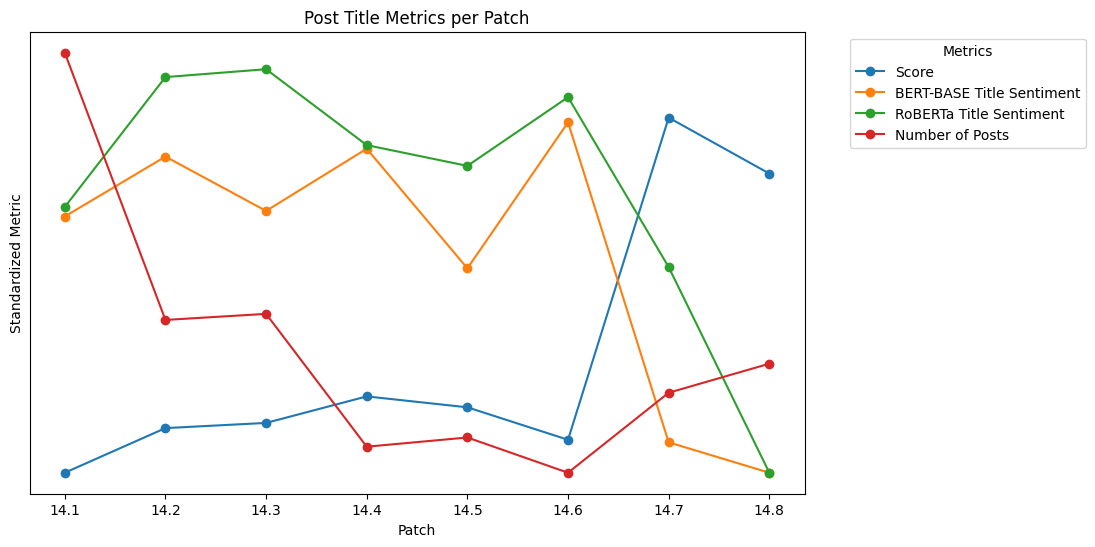

In [14]:
columns_to_normalize = ['Score', 'BERT-BASE Title Sentiment', 'RoBERTa Title Sentiment', 'Number of Posts']
titles_avg[columns_to_normalize] = titles_avg[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
titles_avg[columns_to_normalize] = titles_avg[columns_to_normalize].apply(lambda x: x - x.min())

plt.figure(figsize=(10, 6))
for score in ['Score', 'BERT-BASE Title Sentiment', 'RoBERTa Title Sentiment', 'Number of Posts']:
    plt.plot(titles_avg['Patch'], titles_avg[score], marker='o', label=score)

plt.title('Post Title Metrics per Patch')
plt.xlabel('Patch')
plt.ylabel('Standardized Metric')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.yticks([])
plt.show()

### Post Content - Average Sentiment Scores per Patch

In [6]:
content_avg = reddit_posts
content_avg = content_avg.drop(content_avg[(content_avg['BERT-BASE Content Sentiment'] == -1) | (content_avg['RoBERTa Content Sentiment'] == -1)].index)
content_avg = content_avg.groupby('Patch').agg({'Score': 'mean',
                                                     'BERT-BASE Content Sentiment': 'mean',
                                                     'RoBERTa Content Sentiment': 'mean',
                                                     'ID': 'size'}).reset_index()
content_avg = content_avg.rename(columns={'ID': 'Number of Self-Posts'})
content_avg

,Patch,Score,BERT-BASE Content Sentiment,RoBERTa Content Sentiment,Number of Self-Posts
0,14.1,10.613057,1.826079,0.920028,5652
1,14.2,10.866148,1.775875,0.900389,3855
2,14.3,12.125247,1.826087,0.909091,4048
3,14.4,11.580826,1.807670,0.912389,3390
4,14.5,12.087209,1.782849,0.919186,3440
5,14.6,12.512548,1.790541,0.895109,3108
6,14.7,31.488736,1.759608,0.874371,3773
7,14.8,29.922027,1.746653,0.883697,3809


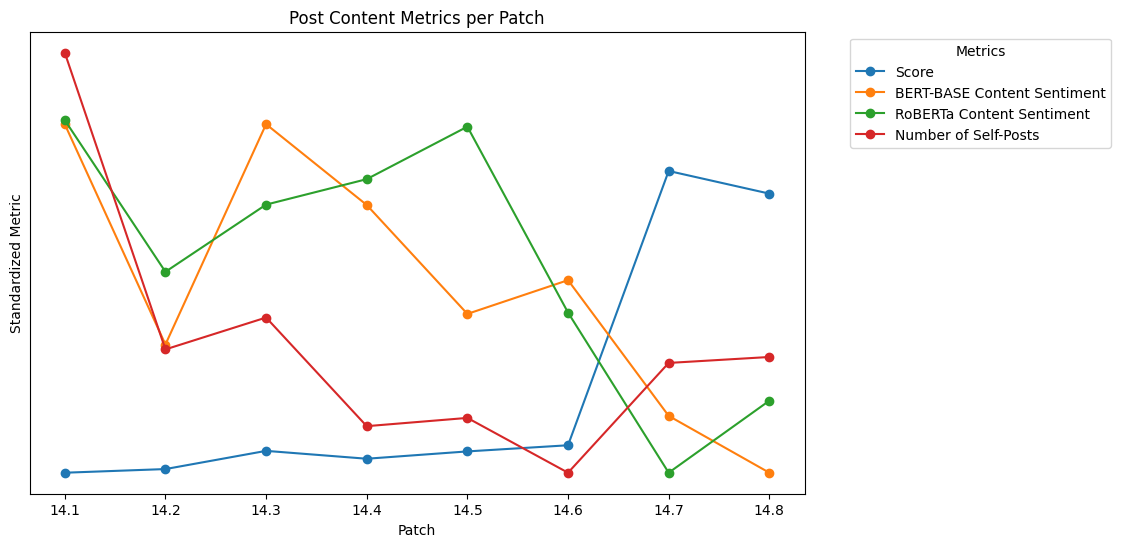

In [15]:
columns_to_normalize = ['Score', 'BERT-BASE Content Sentiment', 'RoBERTa Content Sentiment', 'Number of Self-Posts']
content_avg[columns_to_normalize] = content_avg[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
content_avg[columns_to_normalize] = content_avg[columns_to_normalize].apply(lambda x: x - x.min())

plt.figure(figsize=(10, 6))
for score in ['Score', 'BERT-BASE Content Sentiment', 'RoBERTa Content Sentiment', 'Number of Self-Posts']:
    plt.plot(content_avg['Patch'], content_avg[score], marker='o', label=score)

plt.title('Post Content Metrics per Patch')
plt.xlabel('Patch')
plt.ylabel('Standardized Metric')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.yticks([])
plt.show()

### Comments Content - Average Sentiment Scores per Patch

In [16]:
comments_avg = reddit_comments.merge(reddit_posts[['ID', 'Patch']], left_on='Parent ID', right_on='ID', how='left')
comments_avg.drop('ID', axis=1, inplace=True)
comments_avg = comments_avg.drop(comments_avg[(comments_avg['BERT-BASE Comment Sentiment'] == -1) | (comments_avg['RoBERTa Comment Sentiment'] == -1)].index)
comments_avg = comments_avg.groupby('Patch').agg({'Score': 'mean',
                                                     'BERT-BASE Comment Sentiment': 'mean',
                                                     'RoBERTa Comment Sentiment': 'mean',
                                                     'Comment ID': 'size'}).reset_index()
comments_avg = comments_avg.rename(columns={'Comment ID': 'Number of Comments'})
comments_avg

,Patch,Score,BERT-BASE Comment Sentiment,RoBERTa Comment Sentiment,Number of Comments
0,14.1,4.790050,1.951648,0.966912,49988
1,14.2,4.854921,1.942875,0.958075,39475
2,14.3,4.945291,1.989524,0.971840,41620
3,14.4,4.934512,1.974870,0.962031,34739
4,14.5,5.065768,1.958613,0.959240,35108
5,14.6,5.140830,1.958912,0.950494,32905
6,14.7,12.536859,1.886210,0.903474,47614
7,14.8,11.356284,1.868616,0.888810,47639


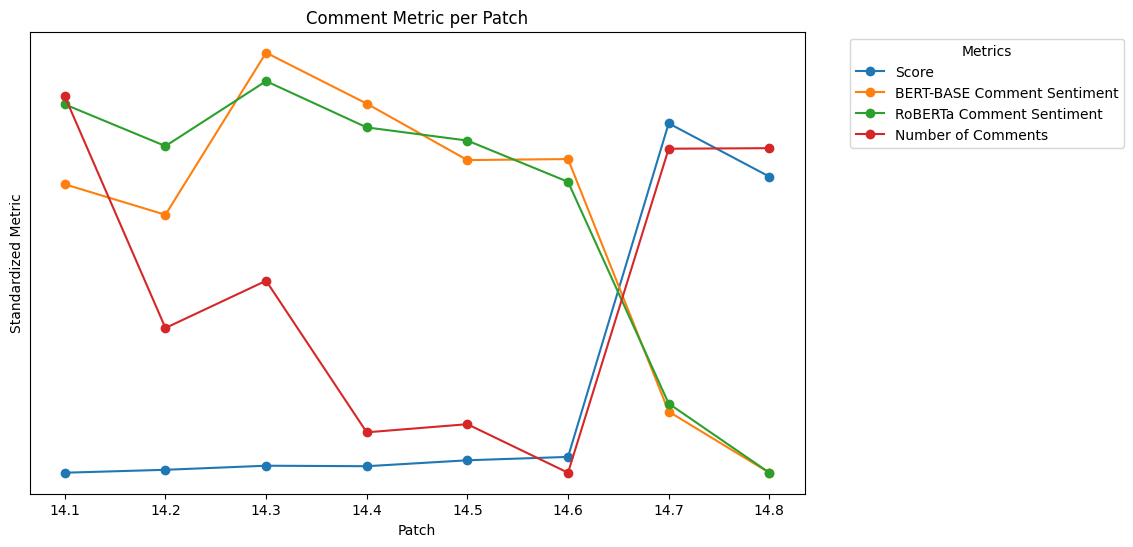

In [17]:
columns_to_normalize = ['Score', 'BERT-BASE Comment Sentiment', 'RoBERTa Comment Sentiment', 'Number of Comments']
comments_avg[columns_to_normalize] = comments_avg[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
comments_avg[columns_to_normalize] = comments_avg[columns_to_normalize].apply(lambda x: x - x.min())

plt.figure(figsize=(10, 6))
for score in ['Score', 'BERT-BASE Comment Sentiment', 'RoBERTa Comment Sentiment', 'Number of Comments']:
    plt.plot(comments_avg['Patch'], comments_avg[score], marker='o', label=score)

plt.title('Comment Metric per Patch')
plt.xlabel('Patch')
plt.ylabel('Standardized Metric')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.yticks([])
plt.show()